<b>Name : Dilshan J.V.A.P<br>
Index number : 190144D<br>
Assignment 2

Github: 

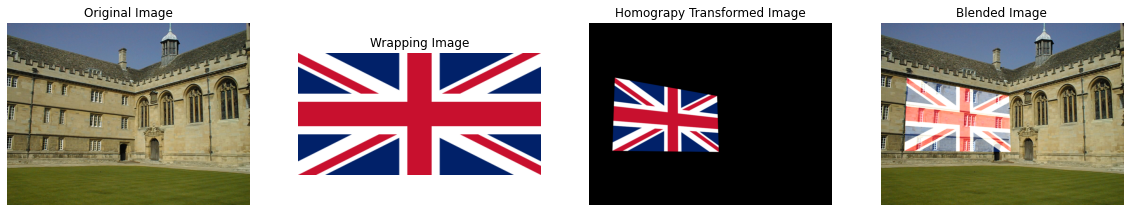

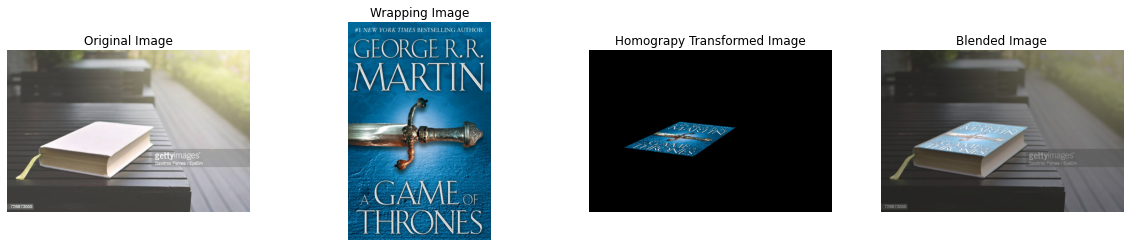

In [2]:
import numpy as np
import cv2 as cv
import matplotlib . pyplot as plt

def MouseHandling(event,x,y,f,pram):
    global im_temp,pts_src
    if event== cv.EVENT_LBUTTONDOWN:
        cv.circle(im_temp ,(x,y),3,(0,255,255),5,cv.LINE_AA)
        cv.imshow("Image",im_temp)
        if len(pts_src)<4:
            pts_src = np.append(pts_src,[(x,y)],axis=0)

architecture_img = cv.imread(r'Images/002.jpg')
flag = cv.imread(r'Images/Flag_of_the_United_Kingdom.png')
height , width = architecture_img.shape[0] , architecture_img.shape[1]
f_width,f_height = flag.shape[1] , flag.shape[0]
pts_dst = np.array([[0,0] , [f_width-1,0] , [f_width-1,f_height-1] , [0,f_height-1] ])
cv.namedWindow("Image",1)
ppp = cv.cvtColor(architecture_img, cv.COLOR_BGR2RGB)
im_temp = cv.cvtColor(ppp, cv.COLOR_RGB2BGR)
pts_src = np.empty((0,2))
cv.setMouseCallback("Image", MouseHandling)
cv.imshow("Image",im_temp)
cv.waitKey(0)

Homograpy_Matrix , status = cv.findHomography(pts_src, pts_dst)
transformed_flag = cv.warpPerspective(flag, np.linalg.inv(Homograpy_Matrix), (width, height))
blend_image = cv.addWeighted(architecture_img, 1, transformed_flag, 0.8, 0)

cv.imshow("Image",blend_image)
cv.waitKey(0)

figure, axes = plt.subplots(1,4, figsize=(20,4) )
axes[0].imshow(cv.cvtColor(architecture_img,cv.COLOR_BGR2RGB))
axes[0].set_title("Original Image")
axes[1].imshow(cv.cvtColor(flag,cv.COLOR_BGR2RGB))
axes[1].set_title("Wrapping Image")
axes[2].imshow(cv.cvtColor(transformed_flag,cv.COLOR_BGR2RGB))
axes[2].set_title("Homograpy Transformed Image")
axes[3].imshow(cv.cvtColor(blend_image,cv.COLOR_BGR2RGB))
axes[3].set_title("Blended Image")
for i in range(4):
    axes[i].axis("off")
cv.destroyAllWindows()

book_img = cv.imread(r'Images/book.jpg')
book_cover = cv.imread(r'Images/Game_of_thrones.webp')
height , width = book_img.shape[0] , book_img.shape[1]
b_width,b_height = book_cover.shape[1] , book_cover.shape[0]
pts_dst = np.array([[0,0] , [b_width-1,0] , [b_width-1,b_height-1] , [0,b_height-1] ])
cv.namedWindow("Image",1)
ppp = cv.cvtColor(book_img, cv.COLOR_BGR2RGB)
im_temp = cv.cvtColor(ppp, cv.COLOR_RGB2BGR)
pts_src = np.empty((0,2))
cv.setMouseCallback("Image", MouseHandling)
cv.imshow("Image",im_temp)
cv.waitKey(0)

Homograpy_Matrix , status = cv.findHomography(pts_src, pts_dst)
transformed = cv.warpPerspective(book_cover, np.linalg.inv(Homograpy_Matrix), (width, height))
blend_image = cv.addWeighted(book_img, 0.6, transformed, 0.5, 0)

cv.imshow("Image",blend_image)
cv.waitKey(0)

figure, axes = plt.subplots(1,4, figsize=(20,4) )
axes[0].imshow(cv.cvtColor(book_img,cv.COLOR_BGR2RGB))
axes[0].set_title("Original Image")
axes[1].imshow(cv.cvtColor(book_cover,cv.COLOR_BGR2RGB))
axes[1].set_title("Wrapping Image")
axes[2].imshow(cv.cvtColor(transformed,cv.COLOR_BGR2RGB))
axes[2].set_title("Homograpy Transformed Image")
axes[3].imshow(cv.cvtColor(blend_image,cv.COLOR_BGR2RGB))
axes[3].set_title("Blended Image")
for i in range(4):
    axes[i].axis("off")
cv.destroyAllWindows()